In [56]:
import pandas as pd
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Read data
df = pd.read_csv('DriftMetaData.csv')
df

,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,n_Week1Day3,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
0,1,1,1,45,1,54,0.509434,610.0,0.316913,34.0,...,774.0,0.495472,387.0,0.383420,741.0,0.535135,NaN,NaN,-1.0,NaN
1,1,1,2,45,1,873,0.321101,217.0,0.601852,3.0,...,452.0,0.308204,197.0,0.535714,-1.0,NaN,NaN,NaN,-1.0,NaN
2,1,1,3,45,1,196,0.635897,686.0,0.400000,15.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
3,1,1,4,45,1,3,0.500000,257.0,0.378906,46.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
4,1,1,5,45,1,0,NaN,726.0,0.388966,1.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,5,2,92,819,0,343,0.654971,158.0,0.477707,NaN,...,326.0,0.646154,212.0,0.545024,NaN,NaN,NaN,NaN,NaN,NaN
1244,5,2,93,819,0,281,0.435714,31.0,0.566667,NaN,...,209.0,0.389423,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,5,2,94,819,0,126,0.328000,395.0,0.428934,NaN,...,562.0,0.556150,328.0,0.425076,NaN,NaN,NaN,NaN,NaN,NaN
1246,5,2,95,819,0,472,0.585987,363.0,0.651934,NaN,...,243.0,0.504132,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
Week=[1,2,3]
Day=[1,2,3]
Int =['n', 'rBias']

In [58]:
column_names=pd.MultiIndex.from_product([Week, Day, Int], names=["Week", "Day", "Int"])
column_names

MultiIndex([(1, 1,     'n'),
            (1, 1, 'rBias'),
            (1, 2,     'n'),
            (1, 2, 'rBias'),
            (1, 3,     'n'),
            (1, 3, 'rBias'),
            (2, 1,     'n'),
            (2, 1, 'rBias'),
            (2, 2,     'n'),
            (2, 2, 'rBias'),
            (2, 3,     'n'),
            (2, 3, 'rBias'),
            (3, 1,     'n'),
            (3, 1, 'rBias'),
            (3, 2,     'n'),
            (3, 2, 'rBias'),
            (3, 3,     'n'),
            (3, 3, 'rBias')],
           names=['Week', 'Day', 'Int'])

In [59]:
df.columns

Index(['BatchNumber', 'TrayNumber', 'FlyID', 'LineNumber', 'Sex',
       'n_Week1Day1', 'rBias_Week1Day1', 'n_Week1Day2', 'rBias_Week1Day2',
       'n_Week1Day3', 'rBias_Week1Day3', 'n_Week2Day1', 'rBias_Week2Day1',
       'n_Week2Day2', 'rBias_Week2Day2', 'n_Week2Day3', 'rBias_Week2Day3',
       'n_Week3Day1', 'rBias_Week3Day1', 'n_Week3Day2', 'rBias_Week3Day2',
       'n_Week3Day3', 'rBias_Week3Day3'],
      dtype='object')

In [60]:
#Columns that are remaining the same
df.set_index(['BatchNumber', 'TrayNumber', 'FlyID', 'LineNumber', 'Sex' ], inplace=True)
df.columns=column_names

In [61]:
df

Week                                           1                             \
Day                                            1                2             
Int                                            n     rBias      n     rBias   
BatchNumber TrayNumber FlyID LineNumber Sex                                   
1           1          1     45         1     54  0.509434  610.0  0.316913   
                       2     45         1    873  0.321101  217.0  0.601852   
                       3     45         1    196  0.635897  686.0  0.400000   
                       4     45         1      3  0.500000  257.0  0.378906   
                       5     45         1      0       NaN  726.0  0.388966   
...                                          ...       ...    ...       ...   
5           2          92    819        0    343  0.654971  158.0  0.477707   
                       93    819        0    281  0.435714   31.0  0.566667   
                       94    819        0    126  0.328000  395.0  0.428934   
                       95    819        0    472  0.585987  363.0  0.651934   
                       96    819        0     39  0.552632  133.0  0.560606   

Week                                                             2            \
Day                                             3                1             
Int                                             n     rBias      n     rBias   
BatchNumber TrayNumber FlyID LineNumber Sex                                    
1           1          1     45         1    34.0  0.575758  544.0  0.364641   
                       2     45         1     3.0  1.000000  249.0  0.491935   
                       3     45         1    15.0  0.500000   -1.0       NaN   
                       4     45         1    46.0  0.533333  126.0  0.512000   
                       5     45         1     1.0       NaN   -1.0       NaN   
...                                           ...       ...    ...       ...   
5           2          92    819        0     NaN       NaN  688.0  0.621543   
                       93    819        0     NaN       NaN  682.0  0.381791   
                       94    819        0     NaN       NaN  701.0  0.640000   
                       95    819        0     NaN       NaN  615.0  0.540717   
                       96    819        0     NaN       NaN  438.0  0.519451   

Week                                                                           \
Day                                              2                3             
Int                                              n     rBias      n     rBias   
BatchNumber TrayNumber FlyID LineNumber Sex                                     
1           1          1     45         1    774.0  0.495472  387.0  0.383420   
                       2     45         1    452.0  0.308204  197.0  0.535714   
                       3     45         1     -1.0       NaN   -1.0       NaN   
                       4     45         1     -1.0       NaN   -1.0       NaN   
                       5     45         1     -1.0       NaN   -1.0       NaN   
...                                            ...       ...    ...       ...   
5           2          92    819        0    326.0  0.646154  212.0  0.545024   
                       93    819        0    209.0  0.389423    0.0       NaN   
                       94    819        0    562.0  0.556150  328.0  0.425076   
                       95    819        0    243.0  0.504132   -1.0       NaN   
                       96    819        0    356.0  0.628169  231.0  0.500000   

Week                                             3                           \
Day                                              1             2          3   
Int                                              n     rBias   n rBias    n   
BatchNumber TrayNumber FlyID LineNumber Sex                                   
1           1          1     45         1    741.0  0.535135 NaN   NaN -1.0   
  

In [62]:
df_longform=pd.melt(df, ignore_index=False)
df_reset=df_longform.reset_index()
df_reset

,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,Week,Day,Int,value
0,1,1,1,45,1,1,1,n,54.0
1,1,1,2,45,1,1,1,n,873.0
2,1,1,3,45,1,1,1,n,196.0
3,1,1,4,45,1,1,1,n,3.0
4,1,1,5,45,1,1,1,n,0.0
...,...,...,...,...,...,...,...,...,...
22459,5,2,92,819,0,3,3,rBias,NaN
22460,5,2,93,819,0,3,3,rBias,NaN
22461,5,2,94,819,0,3,3,rBias,NaN
22462,5,2,95,819,0,3,3,rBias,NaN


In [63]:
df_reset["FlyCode"]="B"+df_reset["BatchNumber"].astype(str)+"T"+df_reset["TrayNumber"].astype(str)+"F"+df_reset["FlyID"].astype(str)+"L"+df_reset["LineNumber"].astype(str)+"S"+df_reset["Sex"].astype(str)
df_reset

,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,Week,Day,Int,value,FlyCode
0,1,1,1,45,1,1,1,n,54.0,B1T1F1L45S1
1,1,1,2,45,1,1,1,n,873.0,B1T1F2L45S1
2,1,1,3,45,1,1,1,n,196.0,B1T1F3L45S1
3,1,1,4,45,1,1,1,n,3.0,B1T1F4L45S1
4,1,1,5,45,1,1,1,n,0.0,B1T1F5L45S1
...,...,...,...,...,...,...,...,...,...,...
22459,5,2,92,819,0,3,3,rBias,NaN,B5T2F92L819S0
22460,5,2,93,819,0,3,3,rBias,NaN,B5T2F93L819S0
22461,5,2,94,819,0,3,3,rBias,NaN,B5T2F94L819S0
22462,5,2,95,819,0,3,3,rBias,NaN,B5T2F95L819S0


In [64]:
df_long= df_reset.pivot(index=['BatchNumber', 'TrayNumber', 'FlyID', 'LineNumber', 'Sex', 'Week', 'Day', 'FlyCode'], columns='Int', values='value')
df_long

Int                                                                     n  \
BatchNumber TrayNumber FlyID LineNumber Sex Week Day FlyCode                
1           1          1     45         1   1    1   B1T1F1L45S1     54.0   
                                                 2   B1T1F1L45S1    610.0   
                                                 3   B1T1F1L45S1     34.0   
                                            2    1   B1T1F1L45S1    544.0   
                                                 2   B1T1F1L45S1    774.0   
...                                                                   ...   
5           2          96    819        0   2    2   B5T2F96L819S0  356.0   
                                                 3   B5T2F96L819S0  231.0   
                                            3    1   B5T2F96L819S0    NaN   
                                                 2   B5T2F96L819S0    NaN   
                                                 3   B5T2F96L819S0    NaN   

Int                                                                    rBias  
BatchNumber TrayNumber FlyID LineNumber Sex Week Day FlyCode                  
1           1          1     45         1   1    1   B1T1F1L45S1    0.509434  
                                                 2   B1T1F1L45S1    0.316913  
                                                 3   B1T1F1L45S1    0.575758  
                                            2    1   B1T1F1L45S1    0.364641  
                                                 2   B1T1F1L45S1    0.495472  
...                                                                      ...  
5           2          96    819        0   2    2   B5T2F96L819S0  0.628169  
                                                 3   B5T2F96L819S0  0.500000  
                                            3    1   B5T2F96L819S0       NaN  
                                                 2   B5T2F96L819S0       NaN  
                                                 3   B5T2F96L819S0       NaN  

[11232 rows x 2 columns]

In [65]:
resetdata=pd.melt(df_long, ignore_index=False)
data_all=df_long.reset_index()
data_all

Int,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,Week,Day,FlyCode,n,rBias
0,1,1,1,45,1,1,1,B1T1F1L45S1,54.0,0.509434
1,1,1,1,45,1,1,2,B1T1F1L45S1,610.0,0.316913
2,1,1,1,45,1,1,3,B1T1F1L45S1,34.0,0.575758
3,1,1,1,45,1,2,1,B1T1F1L45S1,544.0,0.364641
4,1,1,1,45,1,2,2,B1T1F1L45S1,774.0,0.495472
...,...,...,...,...,...,...,...,...,...,...
11227,5,2,96,819,0,2,2,B5T2F96L819S0,356.0,0.628169
11228,5,2,96,819,0,2,3,B5T2F96L819S0,231.0,0.500000
11229,5,2,96,819,0,3,1,B5T2F96L819S0,NaN,NaN
11230,5,2,96,819,0,3,2,B5T2F96L819S0,NaN,NaN


In [66]:
adjustedN = data_all.drop(data_all[data_all['n'] <= 50].index).dropna()
adjustedN

Int,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,Week,Day,FlyCode,n,rBias
0,1,1,1,45,1,1,1,B1T1F1L45S1,54.0,0.509434
1,1,1,1,45,1,1,2,B1T1F1L45S1,610.0,0.316913
3,1,1,1,45,1,2,1,B1T1F1L45S1,544.0,0.364641
4,1,1,1,45,1,2,2,B1T1F1L45S1,774.0,0.495472
5,1,1,1,45,1,2,3,B1T1F1L45S1,387.0,0.383420
...,...,...,...,...,...,...,...,...,...,...
11218,5,2,95,819,0,2,2,B5T2F95L819S0,243.0,0.504132
11224,5,2,96,819,0,1,2,B5T2F96L819S0,133.0,0.560606
11226,5,2,96,819,0,2,1,B5T2F96L819S0,438.0,0.519451
11227,5,2,96,819,0,2,2,B5T2F96L819S0,356.0,0.628169


In [67]:
#djustedN["AbsoluteDay"]=((adjustedN["Week"]-1)*24)+(adjustedN["Day"].astype(int)-1)*2
# Assuming 'Week' and 'Day' are columns in your DataFrame
adjustedN['AbsoluteDay'] = (adjustedN['Week'] - 1) * 7 + np.mod(adjustedN['Day'] - 1, 7) + 1
adjustedN

Int,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,Week,Day,FlyCode,n,rBias,AbsoluteDay
0,1,1,1,45,1,1,1,B1T1F1L45S1,54.0,0.509434,1
1,1,1,1,45,1,1,2,B1T1F1L45S1,610.0,0.316913,2
3,1,1,1,45,1,2,1,B1T1F1L45S1,544.0,0.364641,8
4,1,1,1,45,1,2,2,B1T1F1L45S1,774.0,0.495472,9
5,1,1,1,45,1,2,3,B1T1F1L45S1,387.0,0.383420,10
...,...,...,...,...,...,...,...,...,...,...,...
11218,5,2,95,819,0,2,2,B5T2F95L819S0,243.0,0.504132,9
11224,5,2,96,819,0,1,2,B5T2F96L819S0,133.0,0.560606,2
11226,5,2,96,819,0,2,1,B5T2F96L819S0,438.0,0.519451,8
11227,5,2,96,819,0,2,2,B5T2F96L819S0,356.0,0.628169,9


In [68]:
adjustedN.columns

Index(['BatchNumber', 'TrayNumber', 'FlyID', 'LineNumber', 'Sex', 'Week',
       'Day', 'FlyCode', 'n', 'rBias', 'AbsoluteDay'],
      dtype='object', name='Int')

In [69]:
adjustedN.set_index('LineNumber', inplace=True)

In [70]:
# Get unique line numbers excluding LineNumber 0
unique_line_numbers = adjustedN.index.unique().difference([0])
# Days for correlation
days_to_compare = [2, 3, 8, 9, 10, 15, 16, 17]

/var/folders/pl/_51jddsj4h16v200lg2mxrxc0000gn/T/ipykernel_55960/909879240.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({'Day': day2, 'Correlation': correlation},
/var/folders/pl/_51jddsj4h16v200lg2mxrxc0000gn/T/ipykernel_55960/909879240.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({'Day': day2, 'Correlation': correlation},
/var/folders/pl/_51jddsj4h16v200lg2mxrxc0000gn/T/ipykernel_55960/909879240.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({'Day': day2, 'Correlation': correlation},
/var/folders/pl/_51jddsj4h16v200lg2mxrxc0000gn/T/ipykernel_55960/909879240.py:32: FutureWar

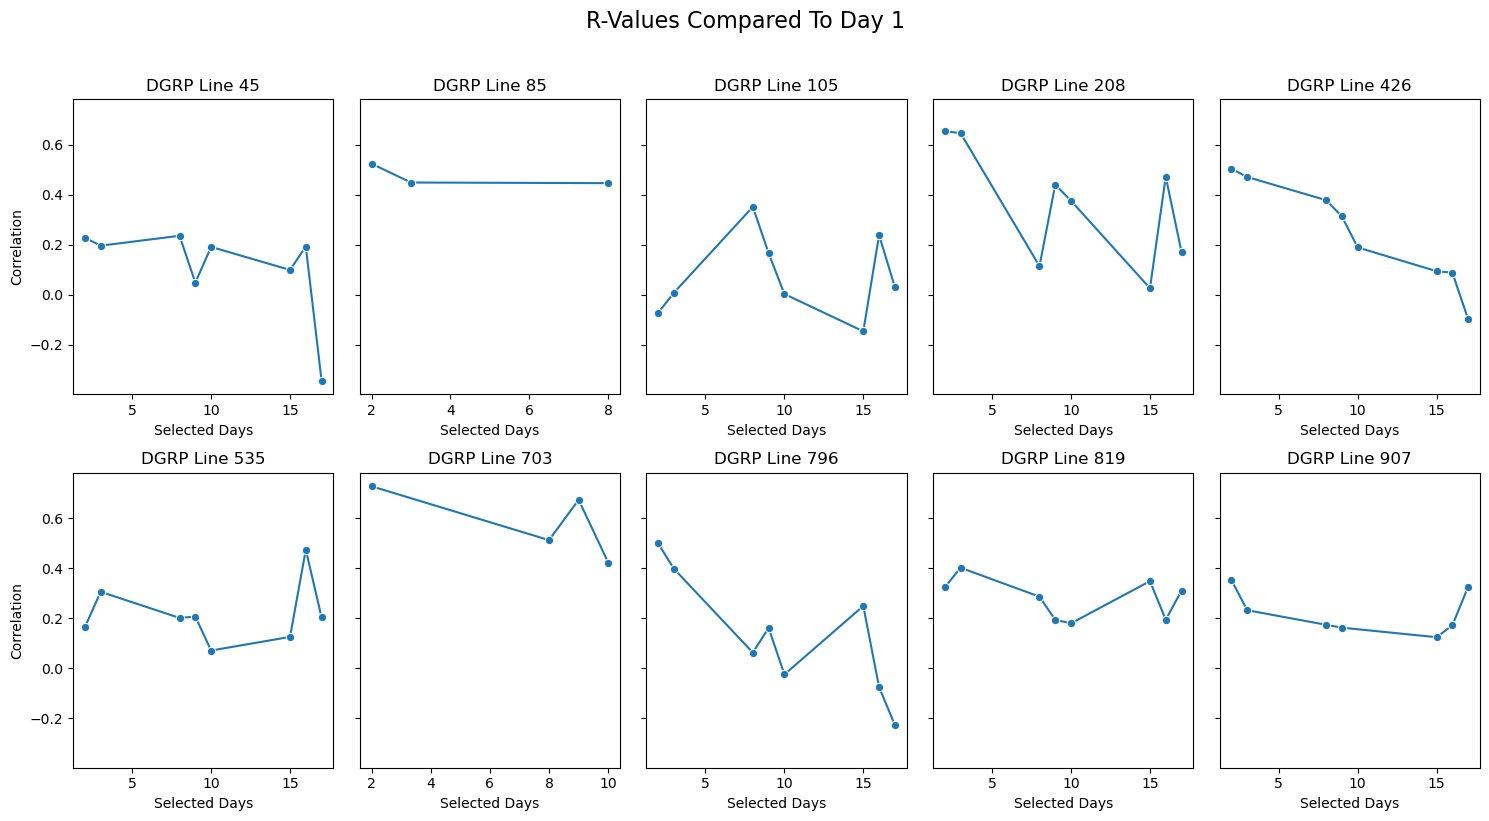

In [71]:
num_rows = 2
num_cols = 5

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8),sharey=True)

# Flatten the 2D array of subplots
axes = axes.flatten()
for i, line_number in enumerate(unique_line_numbers):
    # Filter  for the current LineNumber
    line_data = adjustedN.loc[line_number]

    #store correlation data
    correlation_data = pd.DataFrame(columns=['Day', 'Correlation'])

    # Iterate over the specified days
    for day2 in days_to_compare:
        # Filter data for the current days
        day1_data = line_data[line_data['AbsoluteDay'] == 1]
        day2_data = line_data[line_data['AbsoluteDay'] == day2]

        # Check if DataFrames are not empty
        if not day1_data.empty and not day2_data.empty:
            # Merge data for the current days
            merged_data = pd.merge(day1_data, day2_data, on=['BatchNumber', 'TrayNumber', 'FlyID'],
                                   suffixes=('_day1', f'_day{day2}'))

            # Calculate correlation between rBias values
            correlation = merged_data['rBias_day1'].corr(merged_data[f'rBias_day{day2}'])

            # Append data to the DataFrame
            correlation_data = correlation_data.append({'Day': day2, 'Correlation': correlation},
                                                       ignore_index=True)
        else:
            # If either DataFrame is empty, set NaN in the correlation data
            correlation_data = correlation_data.append({'Day': day2, 'Correlation': None}, ignore_index=True)
                # Plot the line plot using seaborn
    sns.lineplot(x='Day', y='Correlation', marker='o', data=correlation_data, ax=axes[i])

    # Set plot title and labels
    axes[i].set_title(f'DGRP Line {line_number}')
    axes[i].set_xlabel('Selected Days')
    axes[i].set_ylabel('Correlation')
    
# Add a common title for all subplots
fig.suptitle("R-Values Compared To Day 1", y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



In [72]:
adjustedN.reset_index(inplace=True)
adjustedN

Int,LineNumber,BatchNumber,TrayNumber,FlyID,Sex,Week,Day,FlyCode,n,rBias,AbsoluteDay
0,45,1,1,1,1,1,1,B1T1F1L45S1,54.0,0.509434,1
1,45,1,1,1,1,1,2,B1T1F1L45S1,610.0,0.316913,2
2,45,1,1,1,1,2,1,B1T1F1L45S1,544.0,0.364641,8
3,45,1,1,1,1,2,2,B1T1F1L45S1,774.0,0.495472,9
4,45,1,1,1,1,2,3,B1T1F1L45S1,387.0,0.383420,10
...,...,...,...,...,...,...,...,...,...,...,...
4795,819,5,2,95,0,2,2,B5T2F95L819S0,243.0,0.504132,9
4796,819,5,2,96,0,1,2,B5T2F96L819S0,133.0,0.560606,2
4797,819,5,2,96,0,2,1,B5T2F96L819S0,438.0,0.519451,8
4798,819,5,2,96,0,2,2,B5T2F96L819S0,356.0,0.628169,9


In [73]:
# def getSubset(df, line, day):
#     return df.where(adjustedN['Day']==day).where(adjustedN['LineNumber']==line).dropna(how='all')

In [74]:
adjustedN

Int,LineNumber,BatchNumber,TrayNumber,FlyID,Sex,Week,Day,FlyCode,n,rBias,AbsoluteDay
0,45,1,1,1,1,1,1,B1T1F1L45S1,54.0,0.509434,1
1,45,1,1,1,1,1,2,B1T1F1L45S1,610.0,0.316913,2
2,45,1,1,1,1,2,1,B1T1F1L45S1,544.0,0.364641,8
3,45,1,1,1,1,2,2,B1T1F1L45S1,774.0,0.495472,9
4,45,1,1,1,1,2,3,B1T1F1L45S1,387.0,0.383420,10
...,...,...,...,...,...,...,...,...,...,...,...
4795,819,5,2,95,0,2,2,B5T2F95L819S0,243.0,0.504132,9
4796,819,5,2,96,0,1,2,B5T2F96L819S0,133.0,0.560606,2
4797,819,5,2,96,0,2,1,B5T2F96L819S0,438.0,0.519451,8
4798,819,5,2,96,0,2,2,B5T2F96L819S0,356.0,0.628169,9


In [75]:
adjustedN.drop(columns=["n", "Day", "Week"])

Int,LineNumber,BatchNumber,TrayNumber,FlyID,Sex,FlyCode,rBias,AbsoluteDay
0,45,1,1,1,1,B1T1F1L45S1,0.509434,1
1,45,1,1,1,1,B1T1F1L45S1,0.316913,2
2,45,1,1,1,1,B1T1F1L45S1,0.364641,8
3,45,1,1,1,1,B1T1F1L45S1,0.495472,9
4,45,1,1,1,1,B1T1F1L45S1,0.383420,10
...,...,...,...,...,...,...,...,...
4795,819,5,2,95,0,B5T2F95L819S0,0.504132,9
4796,819,5,2,96,0,B5T2F96L819S0,0.560606,2
4797,819,5,2,96,0,B5T2F96L819S0,0.519451,8
4798,819,5,2,96,0,B5T2F96L819S0,0.628169,9


In [76]:
#change the dataframe such that each line corresponds to 1 fly, so we can make sure identity is preserved among pairs
eachlineafly=adjustedN.drop(columns=["n", "Day", "Week"]).pivot(columns=["AbsoluteDay"], index=['LineNumber', 'BatchNumber', 'TrayNumber', 'FlyID', 'Sex',
       'FlyCode'])
eachlineafly.reset_index(inplace=True) #reset index to make sorting by LineNumber easier

In [77]:
justourline=eachlineafly[eachlineafly["LineNumber"]==45] #fukter by line number
justourline 

Int         LineNumber BatchNumber TrayNumber FlyID Sex       FlyCode  \
AbsoluteDay                                                             
1                   45           1          1     1   1   B1T1F1L45S1   
2                   45           1          1     2   1   B1T1F2L45S1   
3                   45           1          1     3   1   B1T1F3L45S1   
4                   45           1          1     4   1   B1T1F4L45S1   
5                   45           1          1     5   1   B1T1F5L45S1   
..                 ...         ...        ...   ...  ..           ...   
138                 45           4          3    43   0  B4T3F43L45S0   
139                 45           4          3    45   0  B4T3F45L45S0   
140                 45           4          3    46   0  B4T3F46L45S0   
141                 45           4          3    47   0  B4T3F47L45S0   
142                 45           4          3    48   0  B4T3F48L45S0   

Int             rBias                                                    \
AbsoluteDay         1         2         3         8         9        10   
1            0.509434  0.316913       NaN  0.364641  0.495472  0.383420   
2            0.321101  0.601852       NaN  0.491935  0.308204  0.535714   
3            0.635897  0.400000       NaN       NaN       NaN       NaN   
4                 NaN  0.378906       NaN  0.512000       NaN       NaN   
5                 NaN  0.388966       NaN       NaN       NaN       NaN   
..                ...       ...       ...       ...       ...       ...   
138          0.542029  0.562147  0.461972  0.466546       NaN       NaN   
139          0.446125  0.508108  0.422182  0.525316       NaN  0.503401   
140          0.570033  0.609218  0.513441  0.457865       NaN  0.388316   
141          0.500671  0.552147  0.555556  0.544855       NaN       NaN   
142          0.404297  0.477143  0.343558  0.328076       NaN  0.517067   

Int                                  
AbsoluteDay        15        16  17  
1            0.535135       NaN NaN  
2                 NaN       NaN NaN  
3                 NaN       NaN NaN  
4                 NaN       NaN NaN  
5                 NaN       NaN NaN  
..                ...       ...  ..  
138               NaN       NaN NaN  
139          0.705882  0.649083 NaN  
140               NaN       NaN NaN  
141               NaN       NaN NaN  
142          0.732143  0.463788 NaN  

[142 rows x 15 columns]

In [78]:
days=justourline["rBias"].loc[:,[1,2]] #filter just day 1 and day 2
days_nonna=days.dropna(how='any') #drop fly if either is NaN
day1=days_nonna[1] #get day 1 and day 2
day2=days_nonna[2]
days_nonna

AbsoluteDay,1,2
1,0.509434,0.316913
2,0.321101,0.601852
3,0.635897,0.400000
6,0.178707,0.478533
7,0.264151,0.470847
...,...,...
138,0.542029,0.562147
139,0.446125,0.508108
140,0.570033,0.609218
141,0.500671,0.552147


In [79]:
def getSubset(df, line, days):
    justourline=eachlineafly[eachlineafly["LineNumber"]==line]
    days=justourline["rBias"].loc[:,days] #filter just day 1 and day 2
    return days.dropna(how='any') 

In [80]:
days=getSubset(eachlineafly, 45, [2,3])


In [81]:
#create multidays where you concadenate each set that is 1 day apart and (separately 1 week apart)


#Do this for all day 1 day n pairs and add confidence intervals to plots above



In [82]:
num_bootstraps=1000 #numbootraps to run, 1000 is goood default
drawindex1=np.arange(days.shape[0])
# drawindex2=np.arange(day2.shape[0])
r=[]
for i in range(num_bootstraps):
    draw1=random.choices(drawindex1, k=len(drawindex1))

    r.append(sci.stats.linregress(days.iloc[draw1,0],days.iloc[draw1,1]).rvalue)
    #This is a bug, because we don't know that day[draw2] values correspond to day 2, draw2 alues


In [83]:
r

[0.22242115165363,
 0.3366868753517975,
 0.05895774708690144,
 0.19682680707866776,
 0.1581185540969073,
 0.22246811453988613,
 0.23287740768745518,
 0.14507912426140201,
 0.3645752681752541,
 0.1867596175450342,
 0.12337394189198422,
 0.16809713545301178,
 0.19762896077074402,
 0.3914104563156136,
 0.13588235928474018,
 0.34500653729269476,
 0.2151631213816899,
 0.10669887162951512,
 0.24077094204285082,
 -0.052676809400599635,
 0.2857435588154357,
 0.24640769824731684,
 0.07070651965882704,
 0.2531665103767305,
 0.3515665728575468,
 0.2637628548883742,
 0.20783472494025101,
 0.2655339780542778,
 0.2708564164798958,
 0.5166988844286169,
 0.16828360633132625,
 0.23824976427588135,
 0.4608697584153954,
 0.30243160387519746,
 0.06984918038033396,
 0.25952042990176083,
 0.16367678794969226,
 0.19032435419124402,
 0.2553090950049838,
 0.2639682873246141,
 0.3463977076268485,
 0.30157383564994883,
 0.1788952649607525,
 0.3294870158816449,
 0.14447980772458244,
 0.29675605779931,
 0.22689749

In [84]:
r_array=np.array(r)
r_array.sort()


In [85]:
r_array[50]

0.059502262428573316

In [86]:
r_array[950]

0.40078140040840404

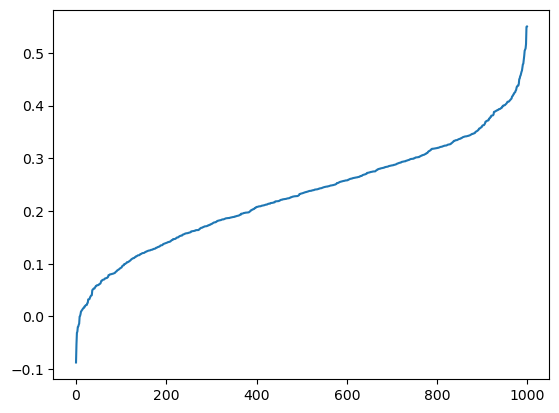

In [87]:
plt.plot(r_array)

<Axes: >

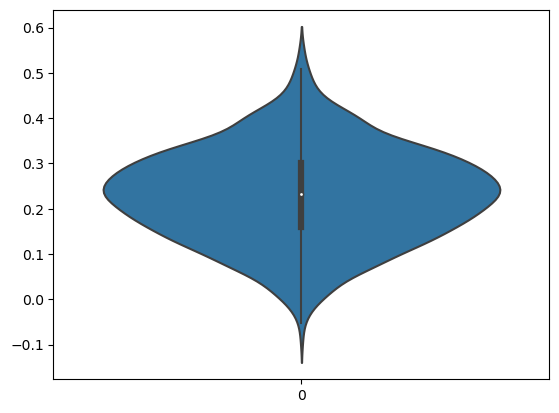

In [88]:
sns.violinplot(r_array)